## Домашнее задание "Сегментация и детекция объектов"

#### Преподаватели: Даниил Корбут, Александр Миленькин
### Распознавание рукописного ввода на примере базы MNIST
#### Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline

import cv2

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Загружаем исходные данные

In [2]:
train = np.loadtxt('./data/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/test.csv', delimiter=',', skiprows=1)

In [231]:
# Преобразуем числа в метки классов
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [235]:
# сохраняем разметку в отдельную переменную
train_label = label.fit_transform(train[:, 0])
train_label

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [303]:
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [304]:
train_img.shape, test_img.shape

((42000, 28, 28), (28000, 28, 28))

## Визуализируем исходные данные

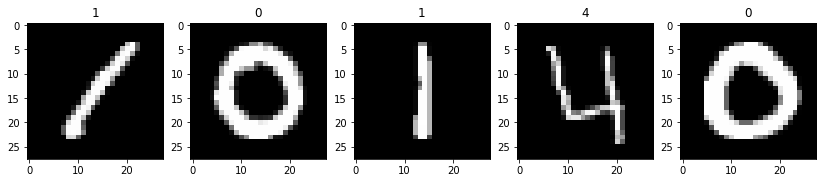

In [305]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [306]:
# выбираем семпл данных для обработки
X_train = train_img.reshape(-1, 28 * 28).astype(np.float32)
X_test = test_img.reshape(-1, 28 * 28).astype(np.float32)

In [307]:
X_train.shape, X_test.shape, train_label.shape

((42000, 784), (28000, 784), (42000,))

In [308]:
# Нормализуем данные
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [309]:
X_train_std.shape, X_test_std.shape

((42000, 784), (28000, 784))

### Выбираем 30 компонент и понижаем рахмерность с помощью PCA

In [310]:
pca = PCA(n_components=30)

In [311]:
X_train = pca.fit_transform(X_train_std)
X_test = pca.transform(X_test_std)

In [312]:
X_train.shape, X_test.shape

((42000, 30), (28000, 30))

In [313]:
y_train, y_val, x_train, x_val = train_test_split(
    train_label, X_train, test_size=0.2,
    random_state=42, stratify=train_label)

### Используем классификатор К-ближайших соседей

In [193]:
clf = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

In [314]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Оцениваем качество решения на валидационной выборке

In [315]:
pred_val = clf.predict(x_val)

In [316]:
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.9475


In [317]:
print(confusion_matrix(y_val, pred_val))

[[810   0   2   3   0   5   5   0   1   1]
 [  0 928   2   1   0   1   3   1   1   0]
 [  6   1 804   8   0   0   1   3   9   3]
 [  4   3  12 803   0  19   0   7  18   4]
 [  0   3   6   0 766   1   5   3   1  29]
 [  4   2   3  23   2 701   8   2   5   9]
 [  5   2   3   0   1   5 809   0   2   0]
 [  0   6   3   5   5   1   0 826   1  33]
 [  9   9  10  16   4  13   5   3 735   9]
 [  4   2   2   2  24   7   0  15   5 777]]


In [318]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       827
           1       0.97      0.99      0.98       937
           2       0.95      0.96      0.96       835
           3       0.93      0.92      0.93       870
           4       0.96      0.94      0.95       814
           5       0.93      0.92      0.93       759
           6       0.97      0.98      0.97       827
           7       0.96      0.94      0.95       880
           8       0.94      0.90      0.92       813
           9       0.90      0.93      0.91       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



## Предсказания на тестовых данных

In [319]:
pred_test = clf.predict(X_test)

## Визуализируем предсказания

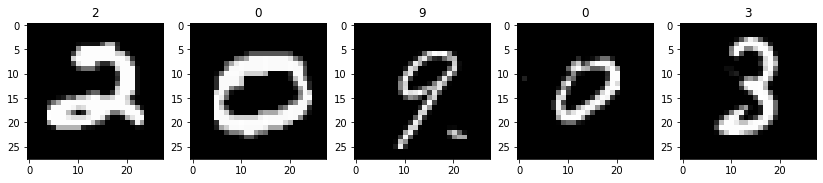

In [320]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [188]:
import pandas as pd
output = pd.read_csv("./data/sample_submission.csv")
output['Label'] = pred_test.astype(int)
output.to_csv('submission.csv', index=False)
output

,ImageId,Label
0,1,2
1,2,4
2,3,7
3,4,7
4,5,2
...,...,...
27995,27996,0
27996,27997,8
27997,27998,8
27998,27999,5


## Your submission scored 0.94750